In [1]:
import pandas as pd

# Load the datasets
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

# Merge datasets to combine customer and transaction information
merged_data = transactions.merge(customers, on="CustomerID", how="inner")

# Display merged dataset
print(merged_data.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price     CustomerName         Region  SignupDate  
0      300.68  300.68   Andrea Jenkins         Europe  2022-12-03  
1      300.68  300.68  Brittany Harvey           Asia  2024-09-04  
2      300.68  300.68  Kathryn Stevens         Europe  2024-04-04  
3      601.36  300.68  Travis Campbell  South America  2024-04-11  
4      902.04  300.68    Timothy Perez         Europe  2022-03-15  


In [2]:
# Convert SignupDate and TransactionDate to datetime
merged_data['SignupDate'] = pd.to_datetime(merged_data['SignupDate'])
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])

# Calculate customer tenure
merged_data['CustomerTenure'] = (merged_data['TransactionDate'] - merged_data['SignupDate']).dt.days

# Aggregate data at the customer level
customer_features = merged_data.groupby('CustomerID').agg(
    total_value=('TotalValue', 'sum'),
    avg_value=('TotalValue', 'mean'),
    total_quantity=('Quantity', 'sum'),
    transactions_count=('TransactionID', 'count'),
    customer_tenure=('CustomerTenure', 'mean')
).reset_index()

print(customer_features.head())

  CustomerID  total_value  avg_value  total_quantity  transactions_count  \
0      C0001      3354.52    670.904              12                   5   
1      C0002      1862.74    465.685              10                   4   
2      C0003      2725.38    681.345              14                   4   
3      C0004      5354.88    669.360              23                   8   
4      C0005      2034.24    678.080               7                   3   

   customer_tenure  
0          701.800  
1          874.500  
2           85.250  
3          663.875  
4          673.000  


In [3]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns to normalize
scaler = StandardScaler()
normalized_features = scaler.fit_transform(customer_features.drop(['CustomerID'], axis=1))

# Convert normalized data back to a DataFrame for clarity
normalized_df = pd.DataFrame(normalized_features, columns=customer_features.columns[1:])
print(normalized_df.head())

   total_value  avg_value  total_quantity  transactions_count  customer_tenure
0    -0.061701  -0.070263       -0.122033           -0.011458         1.086275
1    -0.877744  -0.934933       -0.448000           -0.467494         1.602702
2    -0.405857  -0.026271        0.203934           -0.467494        -0.757401
3     1.032547  -0.076769        1.670787            1.356650         0.972868
4    -0.783929  -0.040028       -0.936951           -0.923530         1.000154


In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(normalized_features)

# Calculate DB Index
db_index = davies_bouldin_score(normalized_features, kmeans.labels_)
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 1.3062324043409608


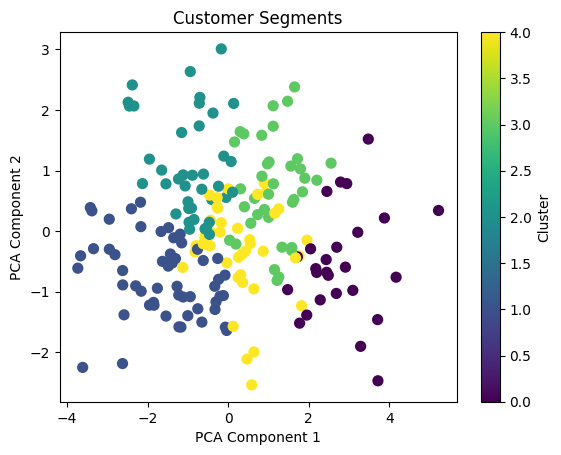

In [5]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(normalized_features)

# Plot clusters
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=customer_features['Cluster'], cmap='viridis', s=50)
plt.title("Customer Segments")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()

In [6]:
customer_features.to_csv("Clustering_Results.csv", index=False)
print("Clustering results saved to Clustering_Results.csv")

Clustering results saved to Clustering_Results.csv
